### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview** 

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons - less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<div class="alert alert-block alert-success">
Preliminary Steps
</div>

### Problems

Use the prompts below to get started with your data analysis.  

<div class="alert alert-block alert-info">
1. Read in the `coupons.csv` file.
</div>

In [2]:
data = pd.read_csv("data/coupons.csv")

In [3]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3293,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,31,Married partner,...,less1,1~3,gt8,less1,1,1,0,0,1,0
10825,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Female,26,Married partner,...,4~8,less1,4~8,less1,1,0,0,1,0,0
11377,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),2h,Female,21,Married partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,0
2763,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,50plus,Married partner,...,never,less1,less1,less1,1,1,0,0,1,0
10487,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,below21,Single,...,1~3,1~3,less1,less1,1,1,0,0,1,1


In [4]:
data.shape

(12684, 26)

In [5]:
data.replace({"age": {"below21": "20", "50plus": "50"}}, inplace=True)
data["age"] = data["age"].astype(int)

<div class="alert alert-block alert-info">
2. Investigate the dataset for missing or problematic data.
</div>

<font color="blueviolet" face="Verdana" size="4">
- Count number of rows with 'nulls' along side percentage
</font>

In [6]:
nullcheck = data.isna().sum()
nullcheckPct = (nullcheck / data.shape[0] * 100).round(2)
df = pd.DataFrame({"Count": nullcheck, "Percentage": nullcheckPct})
df[df["Count"] != 0]

,Count,Percentage
car,12576,99.15
Bar,107,0.84
CoffeeHouse,217,1.71
CarryAway,151,1.19
RestaurantLessThan20,130,1.02
Restaurant20To50,189,1.49


<div class="alert alert-block alert-info">
3. Decide what to do about your missing data -- drop, replace, other...
</div>

<font color="blueviolet" face="Verdana" size="4">
- Looking at above number its pretty evident, we cannot drop rows where 'car' is null. <br>
- 5 columns have less than 2% of data where we have Missing Nulls. <br>
- As we have 12.8K records, we can drop those rows where 5 columns have <2% nulls 
</font>

In [7]:
data = data.dropna(
    subset=[
        "Bar",
        "CoffeeHouse",
        "CarryAway",
        "RestaurantLessThan20",
        "Restaurant20To50",
    ],
    axis=0,
)

<div class="alert alert-block alert-info">
4. What proportion of the total observations chose to accept the coupon?
</div>


In [8]:
(data.groupby("Y")[["Y"]].value_counts() / len(data) * 100).round(2).values[1]

np.float64(56.93)

<div class="alert alert-block alert-info">
5. Use a bar plot to visualize the `coupon` column.
</div>

<font color="blueviolet" face="Verdana" size="4"> 
- Count number of coupons in each category <br>
- Later, map names to more human readable <br>        
</font>

In [9]:
_dict = {
    "Coffee House": "Cafe",
    "Restaurant(<20)": "Restaurant",
    "Carry out & Take away": "Take Out",
    "Bar": "Bar",
    "Restaurant(20-50)": "Luxary Restaurant",
}
_coupons = data["coupon"].value_counts()
_coupons.index = _coupons.index.map(_dict)

Text(0.5, 1.0, 'Coupon Category count')

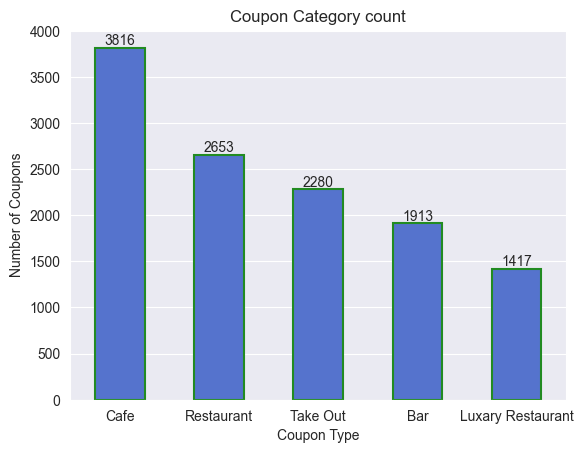

In [10]:
sns.set_style("darkgrid")
coupon_axes = sns.barplot(
    _coupons, width=0.5, color="royalblue", edgecolor="forestgreen", linewidth=1.5
)
coupon_axes.bar_label(coupon_axes.containers[0], fontsize=10)
coupon_axes.set_xlabel("Coupon Type")
coupon_axes.set_ylabel("Number of Coupons")
coupon_axes.set_title("Coupon Category count")

<div class="alert alert-block alert-info">
6. Use a histogram to visualize the temperature column.
</div>

Text(0.5, 1.0, 'Coupon Category count')

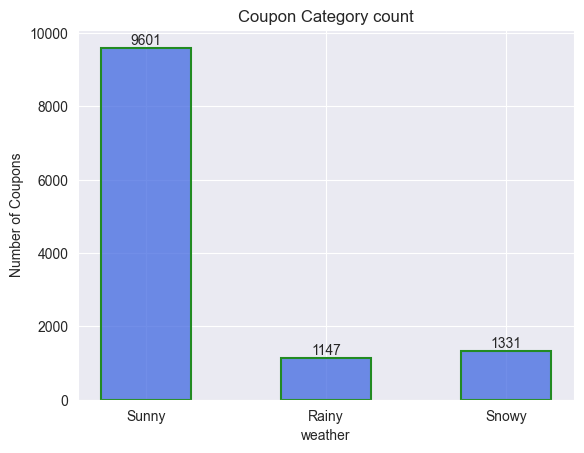

In [11]:
sns.set_style("darkgrid")
coupon_axes = sns.histplot(
    data,
    x="weather",
    shrink=0.5,
    color="royalblue",
    edgecolor="forestgreen",
    linewidth=1.5,
)
coupon_axes.bar_label(coupon_axes.containers[0], fontsize=10)
coupon_axes.set_ylabel("Number of Coupons")
coupon_axes.set_title("Coupon Category count")

Text(0.5, 1.0, 'Weather Distribution')

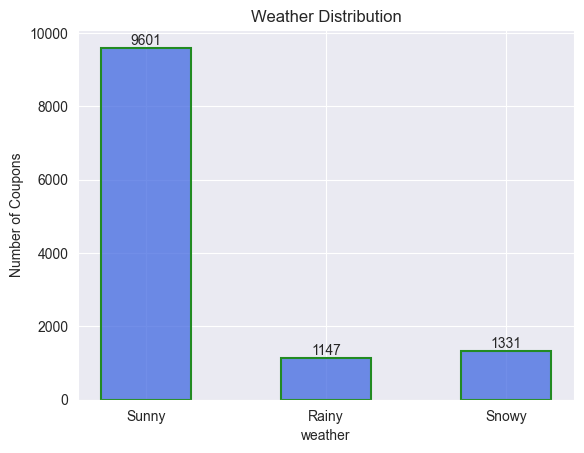

In [12]:
sns.set_style("darkgrid")
histp = sns.histplot(
    data["weather"],
    shrink=0.5,
    color="royalblue",
    edgecolor="forestgreen",
    linewidth=1.5,
)
histp.bar_label(histp.containers[0], fontsize=10)
histp.set_ylabel("Number of Coupons")
histp.set_title("Weather Distribution")

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

<div class="alert alert-block alert-info">
1. Create a new `DataFrame` that contains just the bar coupons.
</div>


In [13]:
bar_coupons = data[data["coupon"] == "Bar"]
bar_coupons.shape

(1913, 26)

<div class="alert alert-block alert-info">
2. What proportion of bar coupons were accepted?
</div>


In [14]:
bar_acceptance = bar_coupons["Y"].value_counts(normalize=True)
bar_acceptance.index = bar_acceptance.index.map({0: "Rejected", 1: "Accepted"})
(bar_acceptance * 100).round(2)

Y
Rejected    58.81
Accepted    41.19
Name: proportion, dtype: float64

In [15]:
res = "{:.2%}".format(bar_acceptance["Accepted"])
res

'41.19%'

<div class="alert alert-block alert-info">
3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
</div>

In [16]:
bar_coupons["Bar"].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [17]:
# Number of users, who go to bar atleat once
bar_customers = bar_coupons.loc[(bar_coupons["Bar"] != "never")]

# Number of users, who go to bar atleat once and also have accepted the coupons.
bar_coupons_accepted = bar_customers.loc[data["Y"] == 1]

<font color="blueviolet" face="Verdana" size="3">
$ \rightarrow $ Question: How many users who go to bars have accepted bar coupon go to bar less than 3 times a month?
</font>

In [18]:
(
    bar_coupons_accepted["Bar"]
    .apply(lambda x: "Ocassional" if x in ("less1", "1~3") else "Frequent")
    .value_counts(normalize=True)
    * 100
).round(2)

Bar
Ocassional    77.0
Frequent      23.0
Name: proportion, dtype: float64

<font color="blueviolet" face="Verdana" size="3">
- Question: What is the distribution of acceptance of bar coupons among who go to bar < 3 times a month vs 3+ times a month
</font>

In [19]:
_bar_freq_dict = {
    "less1": "Ocassional",
    "1~3": "Ocassional",
    "gt8": "Frequent",
    "4~8": "Frequent",
}
lst = (
    bar_customers.replace({"Bar": _bar_freq_dict})[["Bar", "Y"]].value_counts(
        normalize=True
    )
    * 100
).round(2)

In [20]:
lst = pd.DataFrame(lst).reset_index().replace({"Y": {1: "Accepted", 0: "Rejected"}})
pd.pivot_table(
    lst, values="proportion", index="Bar", columns="Y"
)  # Create a pivot table.

Y,Accepted,Rejected
Bar,,
Frequent,13.07,4.09
Ocassional,43.73,39.11


<div class="alert alert-block alert-info">
4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
</div>

<font color="blueviolet" face="Verdana" size="3">
- Question: How many users who go to bars have accepted bar coupon go to bar is over age of 25?
</font>

In [21]:
(
    bar_coupons_accepted["age"]
    .apply(lambda x: "<25 yrs" if x < 25 else "25+ yrs")
    .value_counts(normalize=True)
    * 100
).round(2)

age
25+ yrs    71.67
<25 yrs    28.33
Name: proportion, dtype: float64

<font color="blueviolet" face="Verdana" size="3">
$ \rightarrow $ Question: How many users who go to bars above age of 25 have accepted the coupons?
</font>

In [22]:
(bar_coupons.query("age >= 25")["Y"].value_counts(normalize=True) * 100).round(2)

Y
0    61.39
1    38.61
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
</div>


In [23]:
(bar_coupons["has_children"].value_counts(normalize=True) * 100).round(2)

has_children
0    57.24
1    42.76
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
6. Compare the acceptance rates between those drivers who: <br>
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR* <br>
- go to bars more than once a month and are under the age of 30 *OR*<br>
- go to cheap restaurants more than 4 times a month and income is less than 50K.    <br>
</div>

In [24]:
(
    data[
        (data["Bar"] != "never")
        & (data["has_children"] == False)
        & (data["maritalStatus"] != "Widowed")
    ][["Y"]].value_counts(normalize=True)
    * 100
).round(2)

Y
1    60.23
0    39.77
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
</div>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<div class="alert alert-block alert-danger">
Please refer other ipynb in same folder
</div>